In [ ]:
'''DATASET-2: Diamond Prices
Features Description:
• Price: price in US dollars
• Carat: is the diamond’s physical weight measured in metric carats.
• Cut: quality of the cut
• Color: diamond color, from J (worst) to D (best)
• Clarity: a measurement of how clear the diamond is
• X: length in mm
• Y: width in mm
• Z: depth in mm
• Depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y)
Table: width of the top of diamond relative to widest point'''

In [54]:
#1) 
#i)What is the shape of the dataset(Secify rows and columns seperately)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('dataset_2_Diamonds Prices.csv')
print(df.shape)
print(df.columns)
print(df.dtypes)

(53943, 11)
Index(['index', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')
index        int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [5]:
#ii) List the column names and their data types?
print(df.dtypes)

index        int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [7]:
# iii)Delete "index" column
df=df.drop('index',axis=1)
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [37]:
#2) Describe the summary statistics min,max,mean,standard deviation for all numeric columns
stats = df.describe()
print(stats.loc[['min','max','mean','std']])

         carat      depth      table         price          x          y  \
min   0.200000  43.000000  43.000000    326.000000   0.000000   0.000000   
max   5.010000  79.000000  95.000000  18823.000000  10.740000  58.900000   
mean  0.797935  61.749426  57.457251   3932.734294   5.731166   5.734518   
std   0.473999   1.432672   2.234549   3989.338447   1.121819   1.142165   

              z  
min    0.000000  
max   31.800000  
mean   3.538768  
std    0.705728  


In [10]:
#3) List all distinct values and most frequent values in each column 'cut' 'colour' and 'clarity'
print(df['cut'].unique())
print(df['cut'].value_counts())
print(df['color'].unique())
print(df['color'].value_counts())
print(df['clarity'].unique())
print(df['clarity'].value_counts())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64
['E' 'I' 'J' 'H' 'F' 'G' 'D']
color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [58]:
#4) Identify and describe any data quality issues or inconsistencies within the data set. 
# What steps would you take to clean and pre-processes the data to ensure its accuracy for further analysis.
print("Total missing values")
print(df.isnull().sum().sum())
print("Total duplicate values")
print(df.duplicated().sum().sum())

Total missing values
39
Total duplicate values
0


In [59]:
print(df)
new_df=df.dropna()
print("No of missing values after dropping the missing values and updating the dataset:")
print(new_df.isnull().sum().sum())

       index  carat        cut color clarity  depth  table  price     x     y  \
0          1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1          2   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2          3   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07   
3          4   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4          5   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35   
...      ...    ...        ...   ...     ...    ...    ...    ...   ...   ...   
53938  53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12   
53939  53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87   
53940  53941   0.71    Premium     E     SI1   60.5   55.0   2756  5.79  5.74   
53941  53942   0.71    Premium     F     SI1   59.8   62.0   2756  5.74  5.73   
53942  53943   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71  5.76   

          z  
0      2.43  

In [60]:
#5)
#i) Convert price in US dollars to Rupees? (1 dollar = 80 rupees)
price=df['price']
print(price)
print("Now converting to rupees")
updated_price=price*80
print(updated_price)

0         326
1         326
2         327
3         334
4         335
         ... 
53938    2757
53939    2757
53940    2756
53941    2756
53942    2757
Name: price, Length: 53943, dtype: int64
Now converting to rupees
0         26080
1         26080
2         26160
3         26720
4         26800
          ...  
53938    220560
53939    220560
53940    220480
53941    220480
53942    220560
Name: price, Length: 53943, dtype: int64


In [62]:
#ii) Create a new column called 'color_quality' and values are color+'_'+clarity+'_'+cut?(Ex:E_SI2_Ideal,E_SI1_Premium)
color=df['color']
clarity=df['clarity']
cut=df['cut']
df['color_clarity_cut']=color+'_'+clarity+'_'+cut
print(df)

       index  carat        cut color clarity  depth  table  price     x     y  \
0          1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1          2   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2          3   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07   
3          4   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4          5   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35   
...      ...    ...        ...   ...     ...    ...    ...    ...   ...   ...   
53938  53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12   
53939  53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87   
53940  53941   0.71    Premium     E     SI1   60.5   55.0   2756  5.79  5.74   
53941  53942   0.71    Premium     F     SI1   59.8   62.0   2756  5.74  5.73   
53942  53943   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71  5.76   

          z color_clarity_c

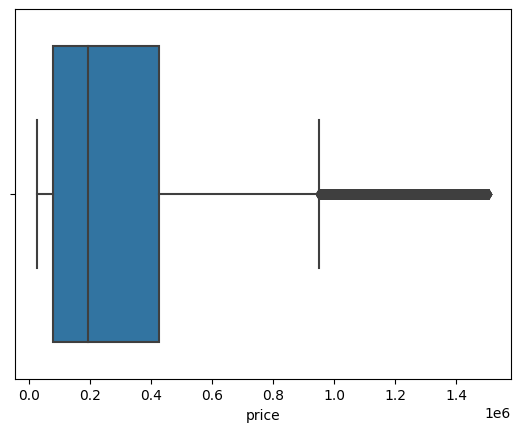

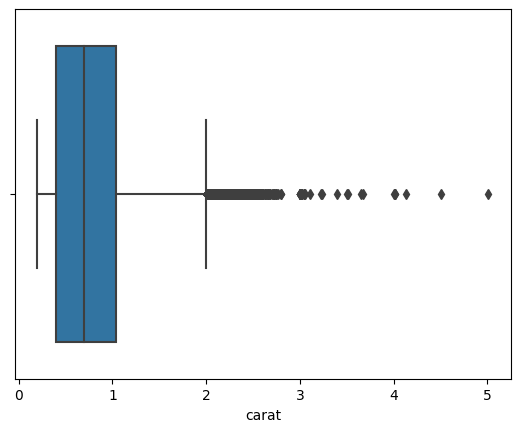

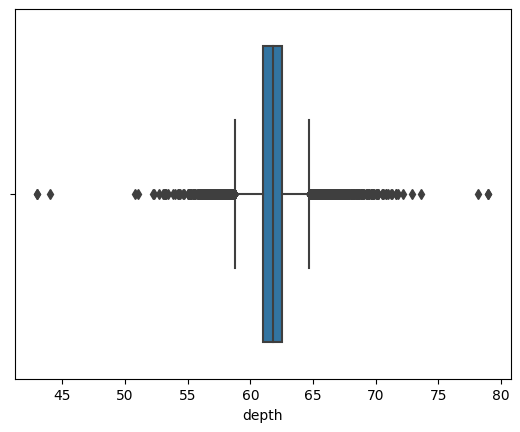

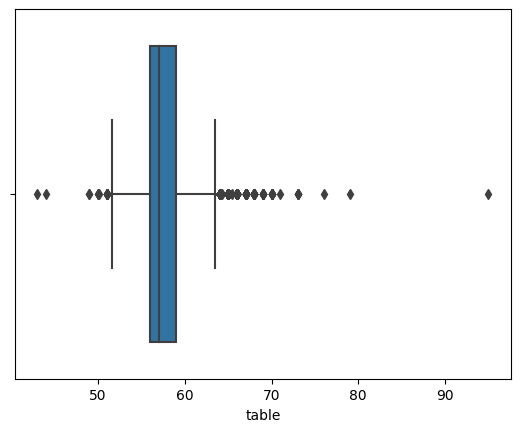

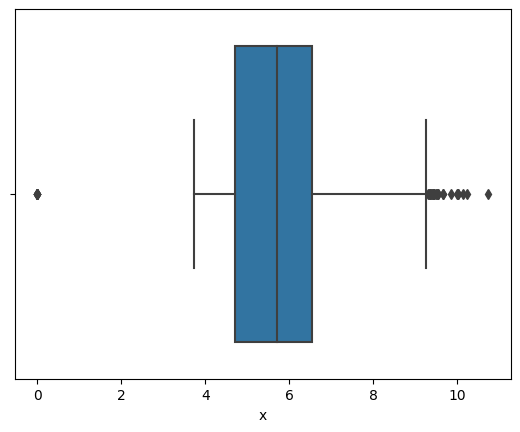

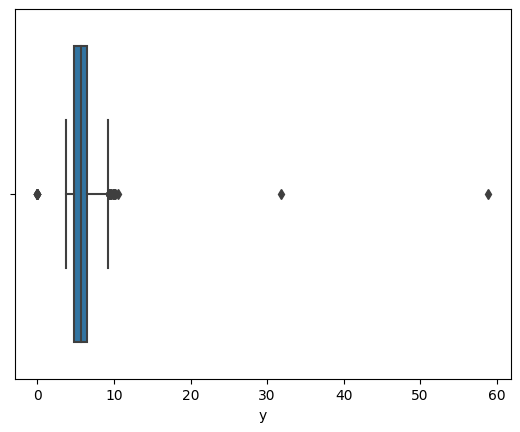

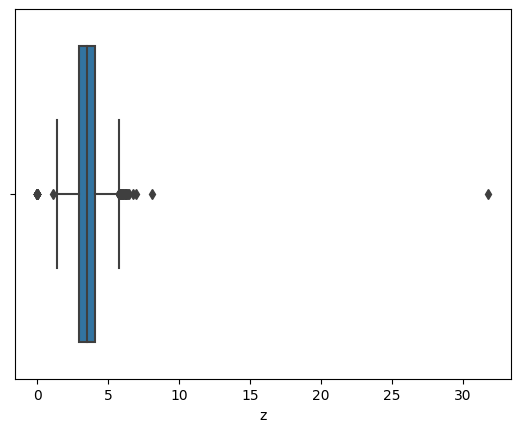

The points outside the whiskers of the box-plots are the outliers and must be eliminated from the data set


In [40]:
#6) check for any outliers in all numeric columns and then analyze carefully how they should be addressed
sns.boxplot(x=df['price'])
plt.show()
sns.boxplot(x=df['carat'])
plt.show()
sns.boxplot(x=df['depth'])
plt.show()
sns.boxplot(x=df['table'])
plt.show()
sns.boxplot(x=df['x'])
plt.show()
sns.boxplot(x=df['y'])
plt.show()
sns.boxplot(x=df['z'])
plt.show()
print("The points outside the whiskers of the box-plots are the outliers and must be eliminated from the data set")

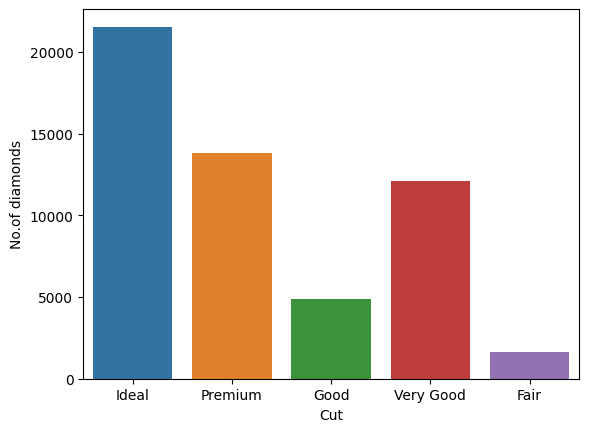

This graph shows the distribution of purchased diamonds by their cut. The number of diamonds of ideal cut was highest


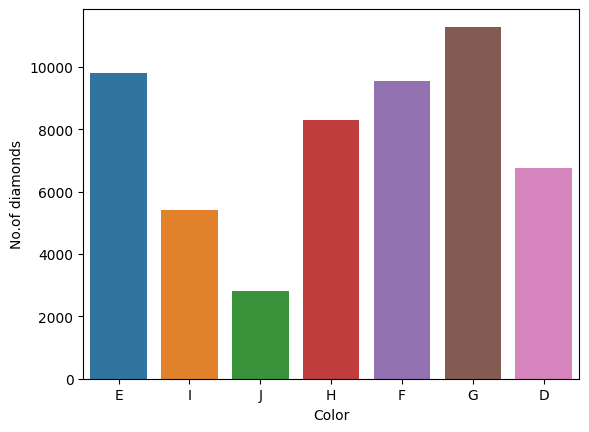

This graph shows distribution of purchased diamonds by color. The number of diamonds of color G are highest


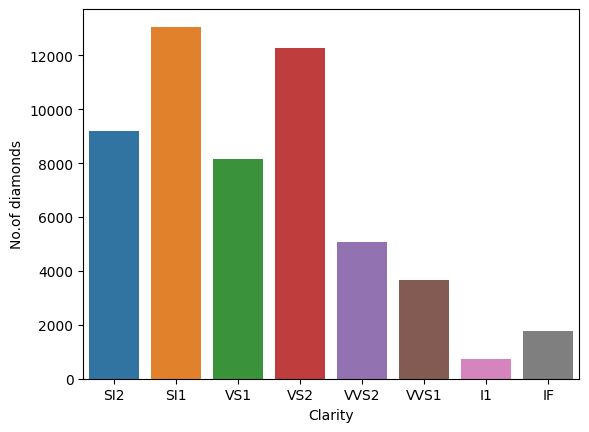

This graph shows distribution of purchased diamonds by their clarity. The number of diamonds with clarity value SI1 is the highest


In [53]:
#8)8. Draw bar plots, visualize and also indicate any insights can be obtained by taking X-axis vs Y-axis as:
#i)Cut vs no.of diamonds
#ii)Color vs no.of diamonds
#iii)Clarity vs no.of diamonds
sns.countplot(x='cut',data=df)
plt.xlabel("Cut")
plt.ylabel("No.of diamonds")
plt.show()
print("This graph shows the distribution of purchased diamonds by their cut. The number of diamonds of ideal cut was highest")
sns.countplot(x='color',data=df)
plt.xlabel("Color")
plt.ylabel("No.of diamonds")
plt.show()
print("This graph shows distribution of purchased diamonds by color. The number of diamonds of color G are highest")
sns.countplot(x='clarity',data=df)
plt.xlabel("Clarity")
plt.ylabel("No.of diamonds")
plt.show()
print("This graph shows distribution of purchased diamonds by their clarity. The number of diamonds with clarity value SI1 is the highest")

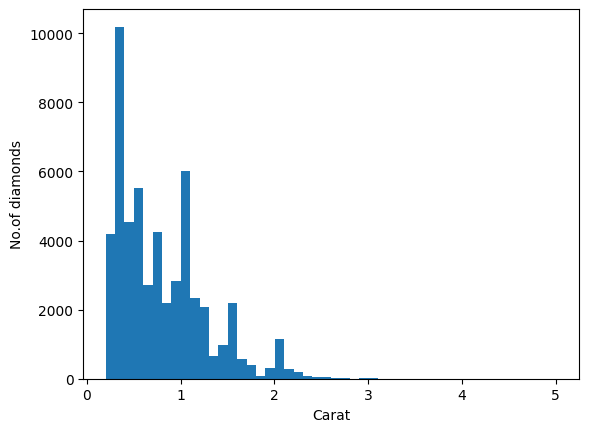

The histogram shows that the number of diamonds with carat value between 0.2 and 0.3 is the highest


In [70]:
#9) Draw a histogram where X-axis->carat with interval size 0.1 and Y-axis->no.of diamonds? and comment on it
num_bins = int((df['carat'].max() - df['carat'].min()) / 0.1)
plt.hist(df['carat'],bins=num_bins)
plt.xlabel("Carat")
plt.ylabel("No.of diamonds")
plt.show()
print("The histogram shows that the number of diamonds with carat value between 0.2 and 0.3 is the highest")

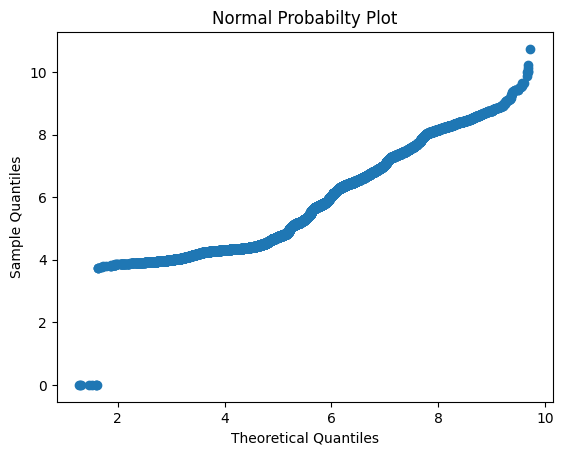

The normal probability plot shows that the data is normally distributed


In [73]:
#10) Draw a normal probabilty plot on X or Y or Z? Based on the shape and trend of the plot is there any conclusion that can be drawn?
#If yes what is it?
col = df['x']
mean = np.mean(col)
std_dev = np.std(col)
normal_dist = np.random.normal(mean,std_dev,len(col))
plt.figure()
plt.title("Normal Probabilty Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.plot(np.sort(normal_dist),np.sort(col),'o')
plt.show()
print("The normal probability plot shows that the data is normally distributed")